### model 10 - Reduced parameters on Image Augmentation with Learning Rate

#### Target:
1. Reduced parameters to work with lesser parameters

#### Results:
Total parameters: 6,022
Best Training Accuracy - 98.86 at the 15th Epoch
Best Testing Accuracy - 99.41 from the 14th epoch

#### Analysis:
1. This model has been more of an experiment to see what is the right parameter size with which this model to could give atleast 2 test accuracy more that 99.4.
2. With around 6k parameters, the model seems to be lineraly increasing the test and train accuracy. 

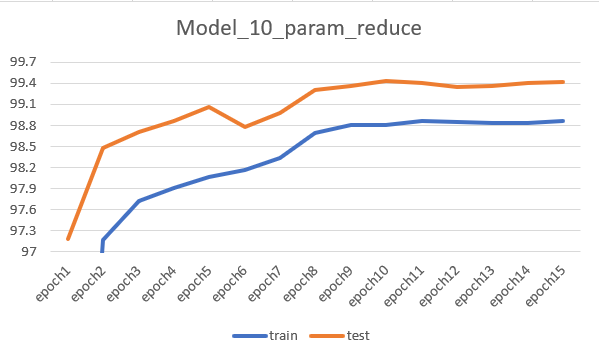

# Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model6

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train Phase transformations
train_transformer = [transforms.RandomRotation((-6.9, 6.9), fill=(1,)),transforms.RandomAffine(degrees=15),
                    transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ]

# Test Phase transformations
test_transformer = [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]


# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model
Let's start with the model we first saw

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model6().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 12, 12, 12]           1,080
      BatchNorm2d-13           [-1, 12, 12, 12]              24
             ReLU-14           [-1, 12,

# Training and Testing

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

# Let's Train and test our model

In [4]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model =  model6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.075, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    val_loss = models.test_losses[-1]  # Get the validation loss from the test_losses list
    scheduler.step(val_loss)

EPOCH: 1


Loss=0.08160506933927536 Batch_id=468 Accuracy=90.02: 100%|██████████| 469/469 [00:27<00:00, 17.36it/s]



Test set: Average loss: 0.0898, Accuracy: 9718/10000 (97.18%)

EPOCH: 2


Loss=0.10283801704645157 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:27<00:00, 17.26it/s]



Test set: Average loss: 0.0452, Accuracy: 9848/10000 (98.48%)

EPOCH: 3


Loss=0.042046692222356796 Batch_id=468 Accuracy=97.72: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]



Test set: Average loss: 0.0390, Accuracy: 9871/10000 (98.71%)

EPOCH: 4


Loss=0.13322827219963074 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:26<00:00, 17.75it/s]



Test set: Average loss: 0.0348, Accuracy: 9887/10000 (98.87%)

EPOCH: 5


Loss=0.040406905114650726 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:26<00:00, 17.84it/s]



Test set: Average loss: 0.0306, Accuracy: 9907/10000 (99.07%)

EPOCH: 6


Loss=0.06221861019730568 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:26<00:00, 17.70it/s]



Test set: Average loss: 0.0365, Accuracy: 9878/10000 (98.78%)

EPOCH: 7


Loss=0.014342064969241619 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]



Test set: Average loss: 0.0307, Accuracy: 9898/10000 (98.98%)

Epoch 00007: reducing learning rate of group 0 to 7.5000e-03.
EPOCH: 8


Loss=0.020452717319130898 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:26<00:00, 17.73it/s]



Test set: Average loss: 0.0194, Accuracy: 9931/10000 (99.31%)

EPOCH: 9


Loss=0.033844493329524994 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:27<00:00, 16.81it/s]



Test set: Average loss: 0.0190, Accuracy: 9936/10000 (99.36%)

EPOCH: 10


Loss=0.05502288416028023 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:26<00:00, 17.80it/s]



Test set: Average loss: 0.0186, Accuracy: 9943/10000 (99.43%)

EPOCH: 11


Loss=0.07425540685653687 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:26<00:00, 17.97it/s]



Test set: Average loss: 0.0179, Accuracy: 9941/10000 (99.41%)

EPOCH: 12


Loss=0.03373389318585396 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:26<00:00, 17.97it/s]



Test set: Average loss: 0.0178, Accuracy: 9935/10000 (99.35%)

EPOCH: 13


Loss=0.02383861131966114 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:26<00:00, 17.92it/s]



Test set: Average loss: 0.0174, Accuracy: 9936/10000 (99.36%)

EPOCH: 14


Loss=0.009948222897946835 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:26<00:00, 17.79it/s]



Test set: Average loss: 0.0180, Accuracy: 9941/10000 (99.41%)

EPOCH: 15


Loss=0.051377564668655396 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:26<00:00, 17.63it/s]



Test set: Average loss: 0.0176, Accuracy: 9942/10000 (99.42%)

Epoch 00015: reducing learning rate of group 0 to 7.5000e-04.


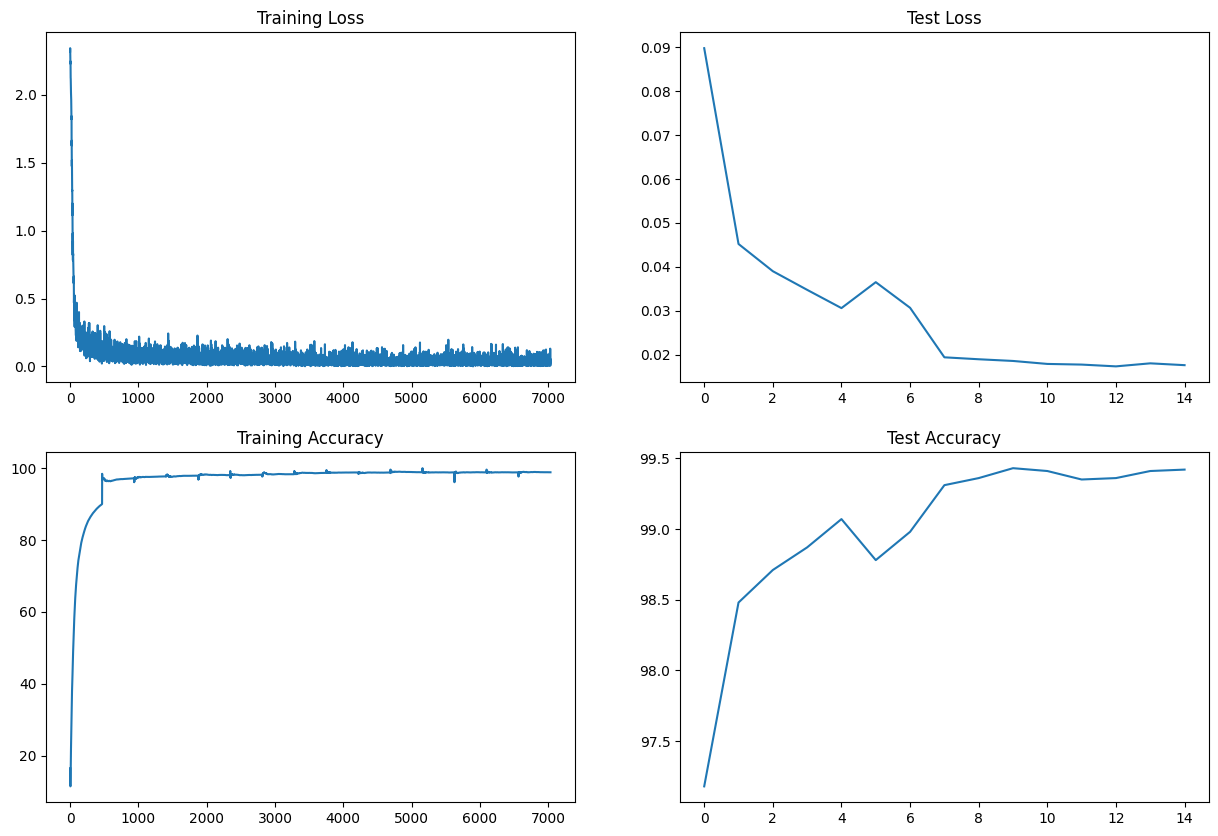

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


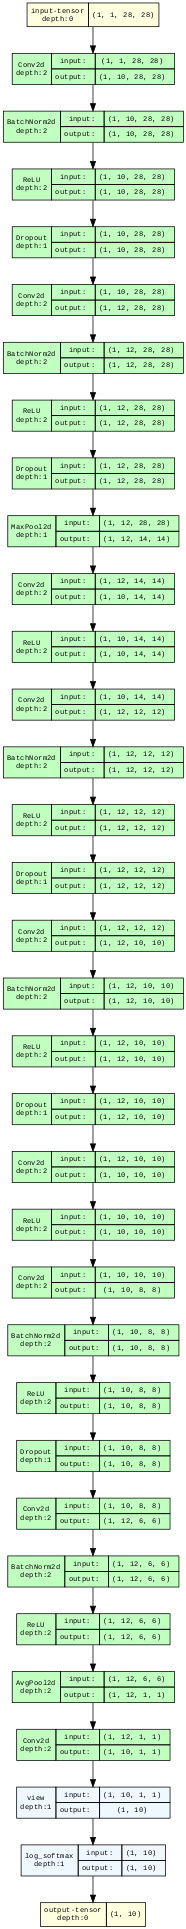

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model6(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph